# DATA 202 - Module 5: Standard Visualizations
* Instructor: Dr. Josh Fagan
* [Jupyter Notebook Tips and Tricks](http://bit.ly/34embJh)
* [Markdown Cheatsheet](http://bit.ly/2UkNVXV)
* Magic command to list all variables: `%whos`

### Instructions

Welcome to the Module 5 assignment of DATA 202. This assignment is meant to help you review/familiarize yourself with standard vizualization techniques in pandas and python.

To receive credit for a assignment, answer all questions correctly and submit before the deadline listed on Canvas.

---
### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*
* Jessi Hudgins
* Y

---
## Exercises


### Exercise 0 - Preamble
Import `pandas`, `matplotlib`, and `seaborn` below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import `house_train.csv`, saving the data to variables called `houses`.

In [2]:
houses = pd.read_csv('/Users/carolinelpetersen/Desktop/DATA202/data/house_train.csv')

#### Create Useful Datetime Info
Create a new column called `date_sold` by concatinating the values in `YrSold` and `MoSold`, with a "/" between the numbers. You can do this with simple column operations.

Cast the value as a `datetime` using the `pd.to_datetime()` function. Be sure to overrite the `date_sold` column you just created.

In [3]:
houses['date_sold'] = houses['YrSold'].astype(str) + '/' + houses['MoSold'].astype(str)

houses['date_sold'] = pd.to_datetime(houses['date_sold'])

houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,date_sold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01


#### Exercise 0 Grading Notes

Exercise 0 Grade:

10/10

### Exercise 1 -  Plot Average House Price By Date
Create a separate `DataFrame`, called `avg_price`, by grouping `houses` by the `date_sold` column and finding the average `SalePrice` per group.

In [4]:
avg_price = houses.groupby(['date_sold']).SalePrice.mean()

Using the `matplotlib` package, create a line plot of the sale price by date.

Text(0.5, 1.0, 'Average House Price by Date')

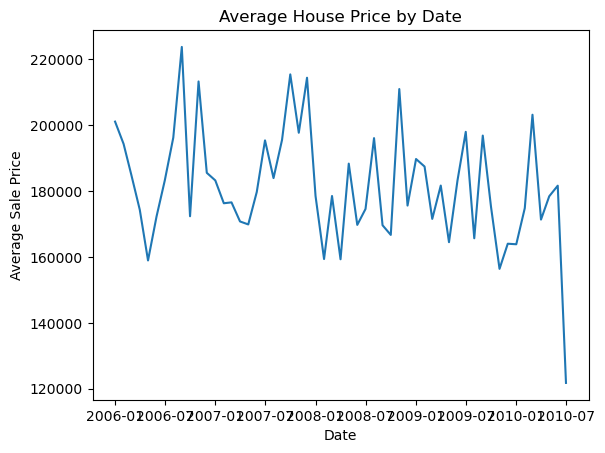

In [5]:
fig, ax = plt.subplots()
ax.plot(avg_price)
ax.set_xlabel('Date')
ax.set_ylabel('Average Sale Price')
ax.set_title('Average House Price by Date') 

Using `matplotlib` implicitely through built-in `pandas` commands, create a line plot of the sale price by date.

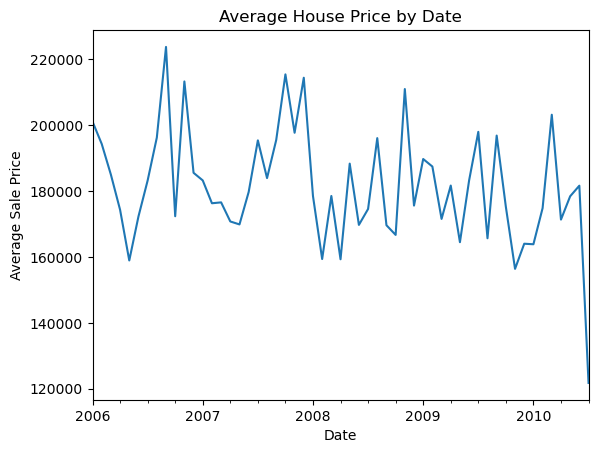

In [6]:
avg_price.plot(title='Average House Price by Date')
plt.xlabel('Date')
plt.ylabel('Average Sale Price')
plt.show()

Use the `houses` DataFrame, create a seaborn line plot (using relplot()), plotting the date sold vs the sale price.

**NOTE:** You do not use the `avg_price` DataFrame, but the `houses` DataFrame. Seaborn is smart enough to do the grouping for us.

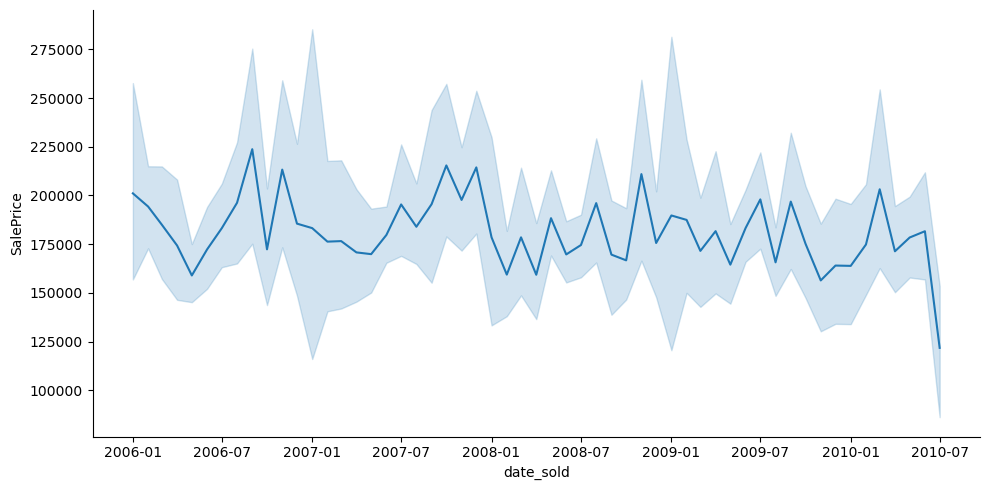

In [7]:
sns.relplot(data=houses, x='date_sold', y='SalePrice', kind='line', aspect=2)

#### Exercise 1 Grading Notes

Exercise 1 Grade:

15/15

### Exercise 2 - Plot the Frequency of Houses Sold by Month
Create a separate `Series` called `month_sold` that stores the name of the month each house was sold and the number of times a house was sold in that month.

Hints: 
- Check out the `datetime` function `month_name()`
- Our old friend `value_counts()` can be helpful

In [8]:
month_sold = houses['date_sold'].dt.month_name()
month_sold.value_counts()

June         253
July         234
May          204
April        141
August       122
March        106
October       89
November      79
September     63
December      59
January       58
February      52
Name: date_sold, dtype: int64

Create a bar plot from the `month_sold` `Series`. You can do this using the pandas built in plot function.

<Axes: >

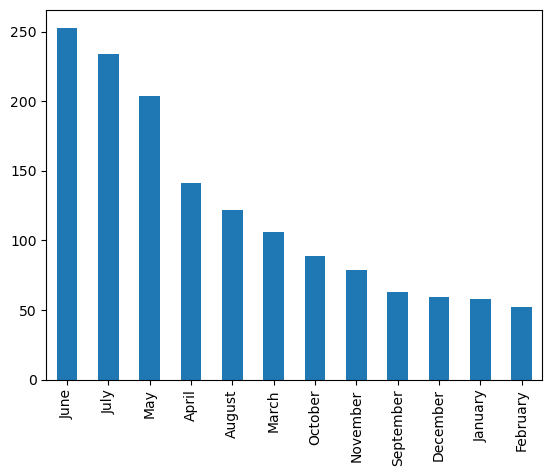

In [9]:
month_sold.value_counts().plot(kind='bar')

#### Exercise 2 Grading Notes

Exercise 2 Grade:

15/15

### Exercise 3 - Create Histogram of Houes Sizes
Use seaborn's `displot` function to create a histogram of the house square footage (`GrLivArea`) values. 

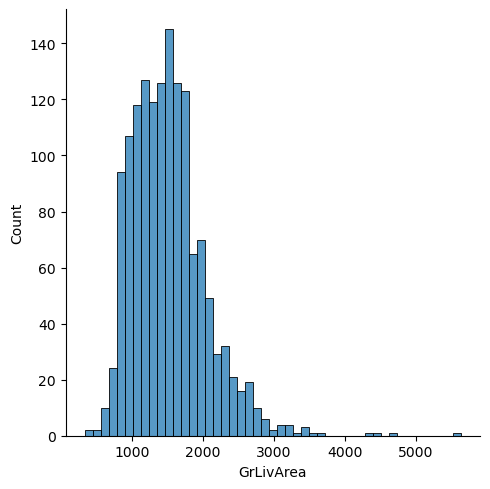

In [10]:
sns.displot(data=houses, x='GrLivArea', kind='hist')

Create the same plot, but this time use an appropriate `displot` argument to have `searborn` group the houses by `HouseStyle` and create a differently colored histogram on the same plot.

**NOTE:** You do not have to do any grouping. All you need to do is supply a value to one of the arguments in `displot`, and `seaborn` will do the rest. 

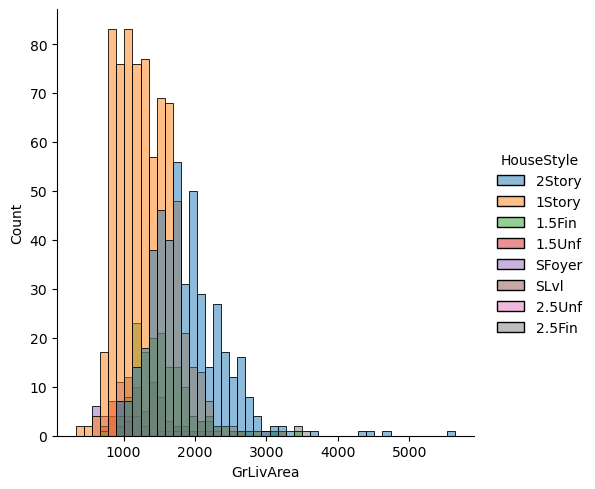

In [11]:
sns.displot(data=houses, x='GrLivArea', kind='hist', hue='HouseStyle', multiple='layer')

#### Exercise 3 Grading Notes

Exercise 3 Grade:

15/15

### Exercise 4 
Run the following cell to load and view a toy dataset describing dining experiences. 

In [12]:
# Run without changes
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Using `seaborn`'s `relplot`, create a scatter plot showing the total bill compared to tip amount. 
- Create separate subplots for time of meal. 
- Color points based on sex of patron
- Change markers depending on smoking or non-smoking
- Change size of marker depening on size of group

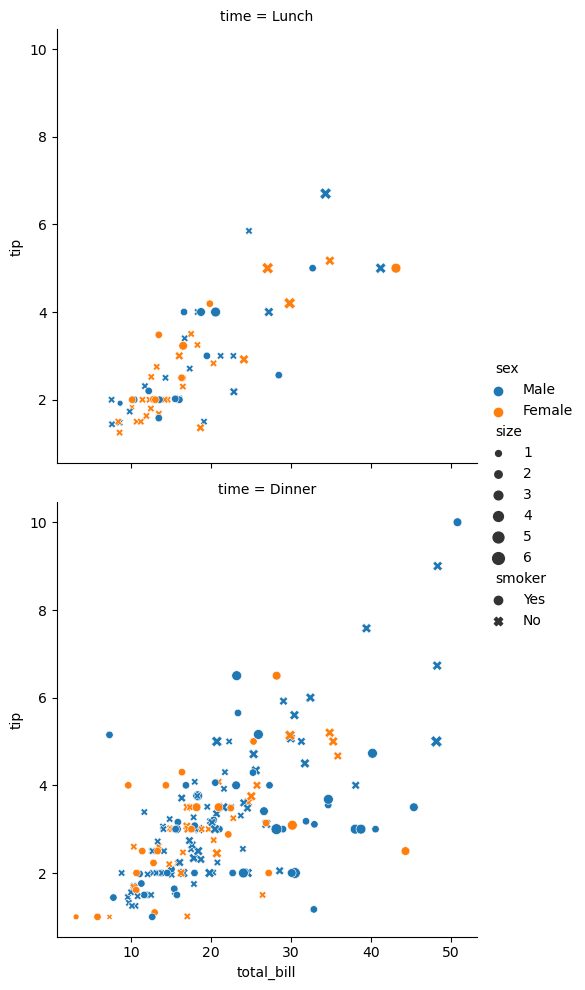

In [13]:
fig = sns.relplot(data=tips, 
                  x="total_bill", 
                  y="tip", 
                  kind='scatter', 
                  row='time', 
                  hue='sex', 
                  size='size', 
                  style='smoker')

#### Exercise 4 Grading Notes

Exercise 4 Grade:

15/15

### Exercise 5

Run the following cell without changes to load a dataset of apple stock values.

In [14]:
# Import Apple stock data, sorting by the date of the information
apple_stock = pd.read_csv('/Users/carolinelpetersen/Desktop/DATA202/data/aapl.csv', 
                          sep=', ', 
                          parse_dates=['Date'], 
                          index_col='Date').sort_values(by='Date')

# Rename column to remove forward slash
apple_stock.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Map the prices to numbers instead of strings
apple_stock.Close = apple_stock.Close.map(lambda price: float(price[1:]))
apple_stock.Open = apple_stock.Open.map(lambda price: float(price[1:]))
apple_stock.High = apple_stock.High.map(lambda price: float(price[1:]))
apple_stock.Low = apple_stock.Low.map(lambda price: float(price[1:]))

tmp_close = pd.DataFrame({'Price': apple_stock.Close[0:100], 'Occurance': 'Close'})
tmp_open = pd.DataFrame({'Price': apple_stock.Open[0:100], 'Occurance': 'Open'})
tmp_high = pd.DataFrame({'Price': apple_stock.High[0:100], 'Occurance': 'High'})
tmp_low = pd.DataFrame({'Price': apple_stock.Low[0:100], 'Occurance': 'Low'})

apple_stock = pd.concat([tmp_close, tmp_open, tmp_high, tmp_low])

apple_stock.head()

/var/folders/4m/qvc8ly2d0mz07rthdgkms0tc0000gn/T/ipykernel_11807/2357750851.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  apple_stock = pd.read_csv('/Users/carolinelpetersen/Desktop/DATA202/data/aapl.csv',


,Price,Occurance
Date,,
2010-03-01,29.8557,Close
2010-03-02,29.8357,Close
2010-03-03,29.9043,Close
2010-03-04,30.1014,Close
2010-03-05,31.2786,Close


Create a line plot, using `seaborn`, showing all data points plot on one line. In `seaborn` this should show the average price per day (based on the 4 collected occurances) and the bounds. 

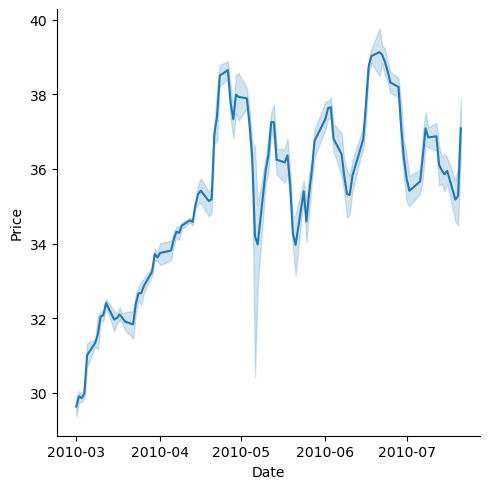

In [15]:
sns.relplot(x='Date', y='Price', data=apple_stock, kind='line')

Copy and paste your code from above, to create the plot again. This time, add the appropriate argument and value to have separate lines for each orrucance type being plotted with a different colored line.

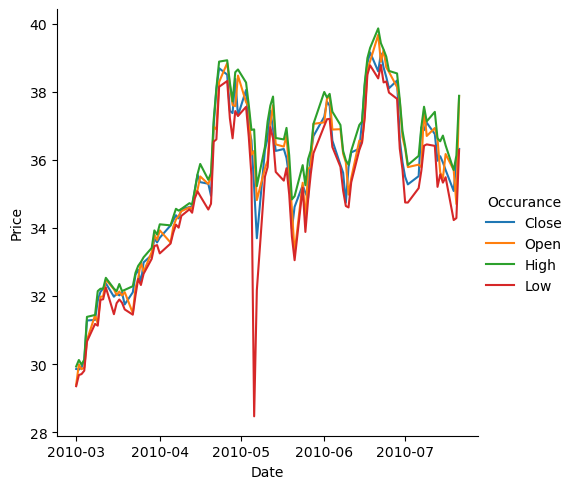

In [16]:
sns.relplot(x='Date', y='Price', data=apple_stock, hue='Occurance', kind='line')

Paste your code again, but this time, add the appropriate argument and value to have separate plots for each orrucance type created. Have the plots organized on a single row. 

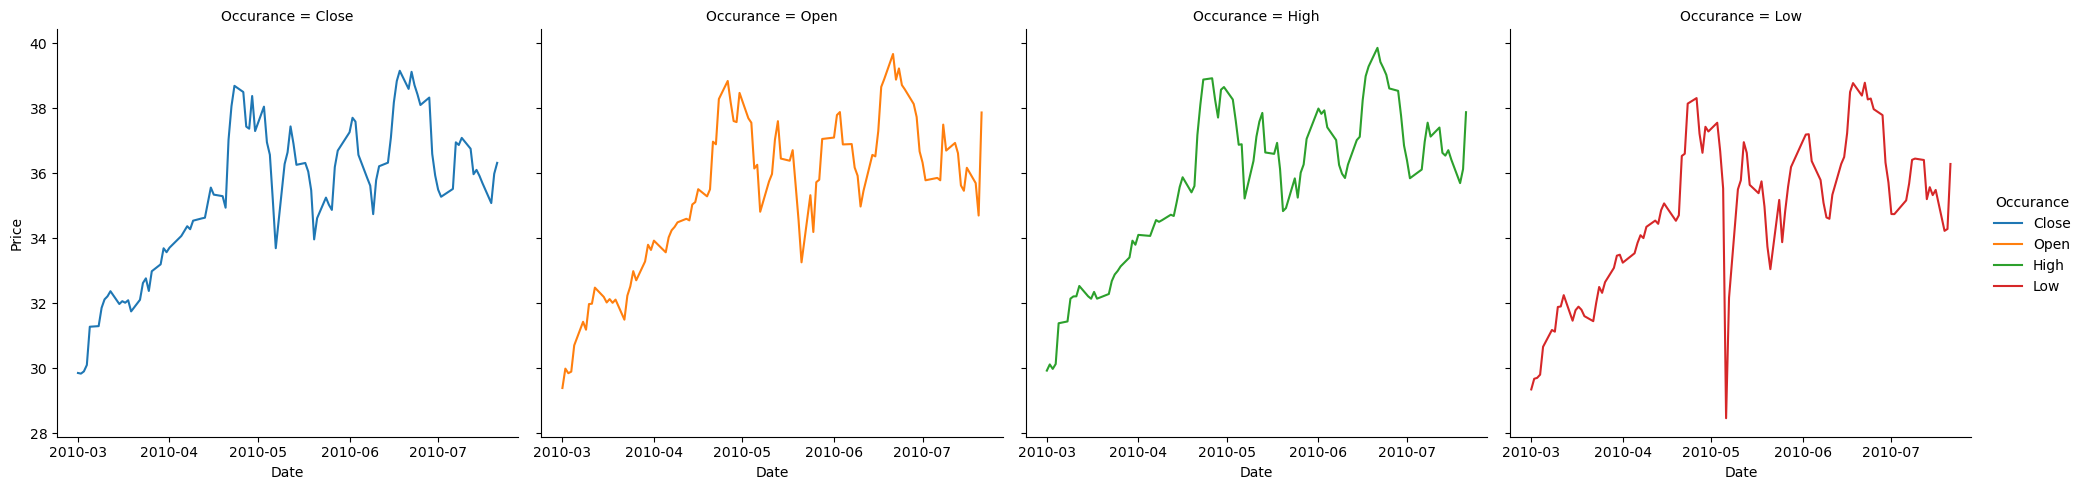

In [17]:
sns.relplot(x='Date', y='Price', data=apple_stock, hue='Occurance', col='Occurance', kind='line')

#### Exercise 5 Grading Notes

Exercise 5 Grade:

15/15

### Exercise 6
Run the following cell without changes to load a view a toy dataset on penguin characteristics. 

In [18]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Create a a basic histogram, with `seaborn`, of penguin flipper length, broken down and colored by species of penguin. 

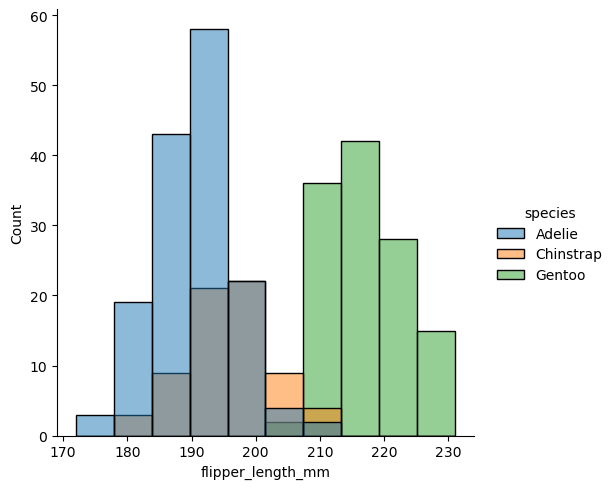

In [19]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='hist')

Now, create a joint plot, with `seaborn`, showing how bill length relates to bill depth, again, break down and color by the species.

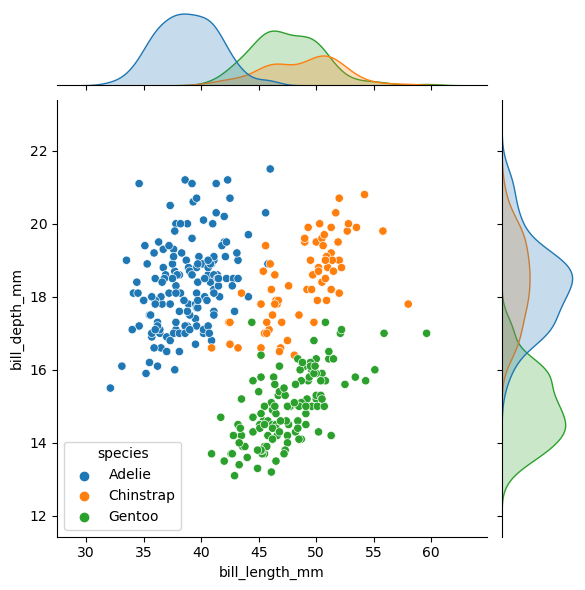

In [20]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

Now, create a pair wise plot, with `seaborn`, that compares all penguin features, again, break down and color based on the species.

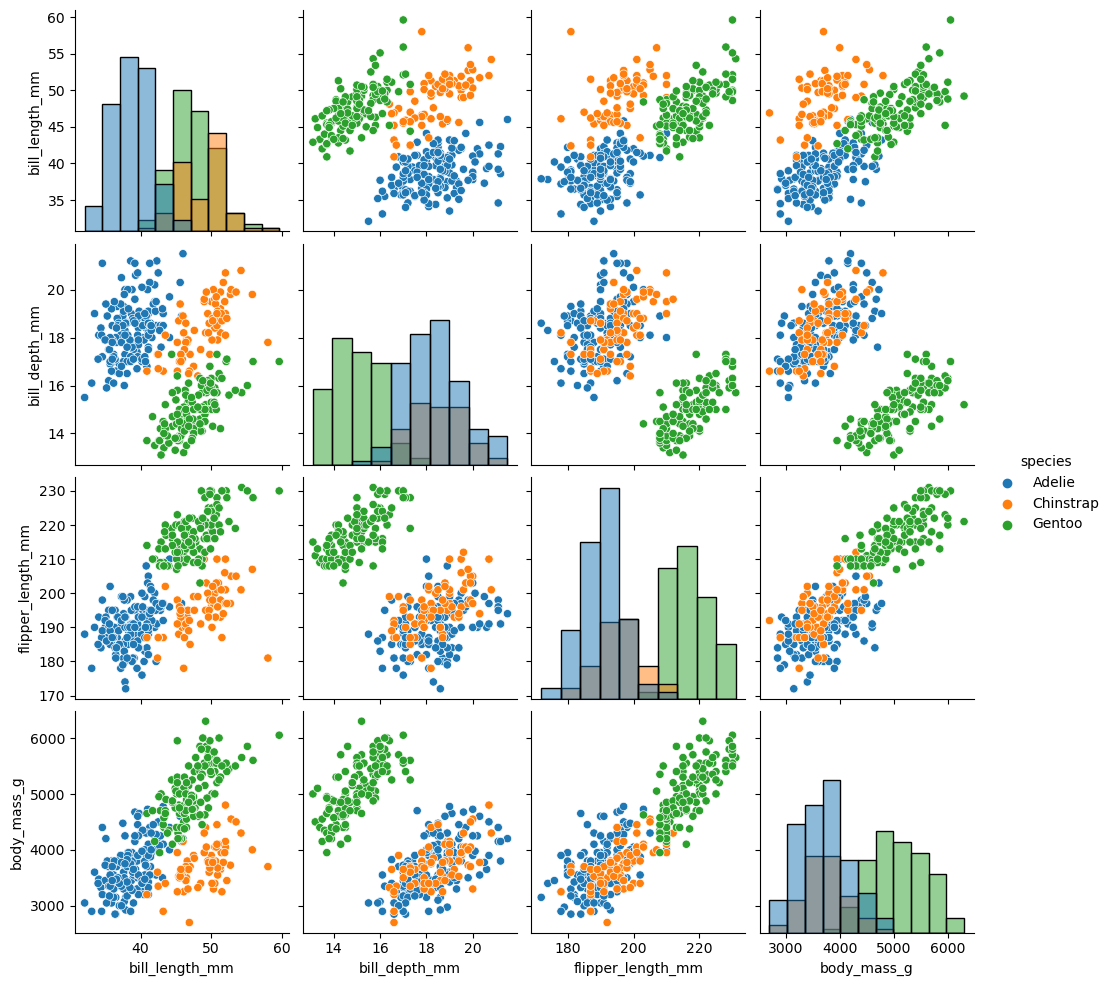

In [21]:
sns.pairplot(data=penguins, hue='species', diag_kind='hist')

Which combination of features seems to be really good at determining whether a penguin is a **Gentoo** penguin or not?

In [22]:
# Your answer here as a comment

# Flipper length and bill depth seem to be good at determing if a penguin is of the Gentoo species. 
# When comparing these two variables, there is a clear distinct grouping of the Gentoo species separate from 
# the other species. Similarly, body mass and bill depth also has a clear clustering for the Gentoo species. 

#### Exercise 6 Grading Notes

Exercise 6 Grade:

15/15

---
## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. I recommend going to the "Kernel" menu at the top and selecting "Restart & Run All". This will ensure that everything runs correctly when it is run sequentially. 

### Final Grade
100/100